# Úkol č. 1 - vizualizace dat a web scraping (do 20. října)

  * V rámci tohoto úkolu musíte stáhnout dat z webu (tzv. _web scraping_, velmi základní) a následně data zpracovat a vizualizovat.
  * Cílem bude stáhnout data ze serveru https://www.volby.cz týkající se voleb do zastupitelstva Vámi vybraného (většího) města, uložit tato data v tabulkovém formátu a pak vymyslet vizualizace a zobrazení dat, které umožní orientaci v těchto datech a zvýrazní zajímavé informace a zobrazit přehledně časový vývoj různých veličin.
 
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

## Výběr zdroje dat

Vyberte si větší město, které má zastupitelstvo druhu 3 (Zastupitelstvo statutárního města) a strojově stáhněte informace o stranách a kandidátkách z následujících let:
 * [2002](https://www.volby.cz/pls/kv2002/kv12?xjazyk=CZ&xid=0), [2006](https://www.volby.cz/pls/kv2006/kv12?xjazyk=CZ&xid=0), [2010](https://www.volby.cz/pls/kv2010/kv12?xjazyk=CZ&xid=0), [2014](https://www.volby.cz/pls/kv2014/kv12?xjazyk=CZ&xid=0) a [2018](https://www.volby.cz/pls/kv2018/kv12?xjazyk=CZ&xid=0).
 

## Pokyny k vypracování

**Základní body zadání**, za jejichž (poctivé) vypracování získáte **8 bodů**:
  * Strojově stáhněte data pro vybrané město a uložte je všechny do (asi dvou) přehledných tabulek ve formátu _csv_.
  * Data musí obsahovat _alespoň_ toto:
    * Vývoj výsledků (v procentech i počtu hlasů) pro jednotlivé strany v jednotlivých letech.
    * Seznam všech kandidátů všech stran v jednotlivých letech, u kandidáta by mělo být zaznamenáno: jméno, věk v době voleb, navrhující strana, politická příslušnost, volební zisk (procento i počet hlasů), pořadí na kandidátce, pořadí zvolení, jestli získal mandát (tyto informace získáte souhrnně ve _jmenných seznamech_).
  * V druhé části Vašeho Jupyter notebooku pracujte s těmito tabulkami načtenými z _csv_ souboru (aby opravující nemusel spouštět stahování z webu).
  * Tabulky ve formátu _csv_ také odevzdejte.
  * S využitím vybraných nástrojů zpracujte data a vymyslete vizualizace a grafy, aby bylo vidět následující:
    * Časový vývoj (po rocích voleb) počtu kandidujících stran i lidí a to celkově i po jednotlivých stranách (ve volbách, kterých se daná strana účastnila).
    * Věkovou strukturu kandidátů celkově i za jednotlivé strany a vývoj této struktury během jednotlivých voleb.
    * Časový vývoj volební účasti a volebních výsledků jednotlivých stran.
    * Časový vývoj podílu kandidujících s titulem a bez titulu.

**Další body zadání** za případné další body (můžete si vybrat, maximum bodů za úkol je každopádně 12 bodů):
  * (až +2 body) U titulů se pokuste rozlišit i různé stupně vzdělání: bakalářský, magisterský, doktorský a vyšší, vojenská hodnost atp. Zkuste odhadnout i podíl žen na kandidátkách.
  * (až +4 body) Pokuste se u jednotlivých kandidátů zjistit, zda kandidovali ve více volbách. Najděte 10 nejpilnějších kandidátů a vypište jejich volební zisky a za jaké strany kandidovali.
  * (až +2 body) Najděte nějaký balíček, který Vám dovolí do Vašeho notebooku zavést interaktivní prvky, např. si vyberete v select-boxu stranu a Váš notebook zobrazí grafy pouze pro ni atp.

## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-VZD/homeworks/index.html.
  * Odevzdejte nejen Jupyter Notebook, ale i _csv_ soubor(y) se staženými daty.
  * Opravující Vám může umožnit úkol dodělat či opravit a získat tak další body. První verze je ale důležitá a bude-li odbytá, budete za to penalizováni.

In [420]:
### odtud už je to Vaše

## Postup
### Načtení dat
Načteme jmenné seznamy pro obec Olomouc.

In [430]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import csv

class DummyHeader:
    def __init__(self, str):
        self.text = str

def dummy(*strs):
    return [DummyHeader(str) for str in strs]

def download_results(url, fix_headers = lambda x: x, fix_row = lambda x: x, table_index = 0):
    results = {"headers": None, "rows": []}
    soup = BeautifulSoup(urlopen(url))
    table = soup.find_all("table")[table_index]

    if results["headers"] == None:
        results["headers"] = [h.text.lower() for h in fix_headers([h for h in table.find_all("th") if h]) if h]

    for row in table.find_all("tr"):
        fixed_row = fix_row([v for v in row.find_all("td") if v])
        results["rows"].append([v.text for v in fixed_row if v])

    return results

def save_results(file, results):
    print(f"Saving to {file}")
    with open(file, "w") as f:
        writer = csv.writer(f)
        writer.writerow(results["headers"])
        writer.writerows(results["rows"])
    return results

filter_supercolumns = lambda headers, filter = lambda x: True: [h for h in headers
                        if  h.text != "Kandidát"
                        and h.text != "Kandidátní listina"
                        and h.text != "Hlasy"
                        and filter(h)
                    ]

# 2002
headers2002 = dummy(
    "obvod", "číslo", "název", "poř. číslo", "příjmení, jméno", "tituly", "věk", "navrh. strana", "polit. přísl.", "abs.", "v %", "pořadí", "mandát"
)

headers_parties = dummy(
    "nazev", "hlasy abs", "hlasy %", "zastupitele abs", "zastupitele %"
)

r2002 = save_results("olomouc-2002.csv", download_results(
    "https://volby.cz/pls/kv2002/kv21111?xjazyk=CZ&xid=0&xv=11&xdz=3&xnumnuts=7102&xobec=500496&xstrana=0",
    lambda _: headers2002
))

p2002 = save_results("olomouc-parties-2002.csv", download_results(
    "https://www.volby.cz/pls/kv2002/kv1211?xjazyk=CZ&xid=0&xv=1&xdz=2&xnumnuts=7102",
    lambda _: headers_parties,
    lambda x: x,
    1
))

# 2006
headers2006_2010 = dummy(
    "obvod", "číslo", "název", "poř. číslo", "příjmení, jméno, tituly", "věk", "navrh. strana", "polit. přísl.", "abs.", "v %", "pořadí", "mandát"
)

r2006 = save_results("olomouc-2006.csv", download_results(
    "https://volby.cz/pls/kv2006/kv21111?xjazyk=CZ&xid=0&xv=11&xdz=3&xnumnuts=7102&xobec=500496&xstrana=0",
    lambda _: headers2006_2010
))

p2006 = save_results("olomouc-parties-2006.csv", download_results(
    "https://www.volby.cz/pls/kv2006/kv1111?xjazyk=CZ&xid=0&xdz=3&xnumnuts=7102&xobec=500496&xobecnaz=OLOMOUC&xstat=0&xvyber=0",
    lambda _: headers_parties,
    lambda x: x,
    1
))

# 2010
r2010 = save_results("olomouc-2010.csv", download_results(
    "https://www.volby.cz/pls/kv2010/kv21111?xjazyk=CZ&xid=0&xv=11&xdz=3&xnumnuts=7102&xobec=500496&xstrana=0",
    lambda _: headers2006_2010
))

p2010 = save_results("olomouc-parties-2010.csv", download_results(
    "https://www.volby.cz/pls/kv2010/kv1111?xjazyk=CZ&xid=0&xdz=3&xnumnuts=7102&xobec=500496&xobecnaz=OLOMOUC&xstat=0&xvyber=0",
    lambda _: headers_parties,
    lambda x: x,
    1
))

# 2014
headers2014_2018 = dummy(
    "číslo", "název", "poř. číslo", "příjmení, jméno, tituly", "věk", "navrh. strana", "polit. přísl.", "abs.", "v %", "pořadí", "mandát"
)

headers_parties_2014 = dummy(
    "cislo", "nazev", "hlasy abs", "hlasy %", "pocet kandidatu", "prepocteny zaklad", "zastupitele %", "zastupitele abs", "podily hlasu"
)

r2014 = save_results("olomouc-2014.csv", download_results(
    "https://www.volby.cz/pls/kv2014/kv21111?xjazyk=CZ&xid=0&xv=11&xdz=3&xnumnuts=7102&xobec=500496&xstrana=0",
    lambda _: headers2014_2018
))

p2014 = save_results("olomouc-parties-2014.csv", download_results(
    "https://www.volby.cz/pls/kv2014/kv1111?xjazyk=CZ&xid=0&xdz=3&xnumnuts=7102&xobec=500496&xobecnaz=OLOMOUC&xstat=0&xvyber=0",
    lambda _: headers_parties_2014,
    lambda x: x,
    1
))

# 2018
headers_parties_2018 = dummy(
    "cislo", "nazev", "hlasy abs", "hlasy %", "pocet kandidatu", "prepocteny zaklad", "zastupitele %", "zastupitele abs", "podily hlasu"
)

r2018 = save_results("olomouc-2018.csv", download_results(
    "https://www.volby.cz/pls/kv2018/kv21111?XJAZYK=CZ&XID=0&XV=11&XDZ=3&XNUMNUTS=7102&XOBEC=500496&XSTRANA=0&xf=1",
    lambda _: headers2014_2018
))

p2018 = save_results("olomouc-parties-2018.csv", download_results(
    "https://www.volby.cz/pls/kv2018/kv1111?XJAZYK=CZ&XID=0&XDZ=3&XNUMNUTS=7102&XOBEC=500496&XSTAT=0&XVYBER=0&xf=1",
    lambda _: headers_parties_2018,
    lambda x: x,
    1
))


Saving to olomouc-2002.csv
Saving to olomouc-parties-2002.csv
Saving to olomouc-2006.csv
Saving to olomouc-parties-2006.csv
Saving to olomouc-2010.csv
Saving to olomouc-parties-2010.csv
Saving to olomouc-2014.csv
Saving to olomouc-parties-2014.csv
Saving to olomouc-2018.csv
Saving to olomouc-parties-2018.csv


In [431]:
import numpy as np
import pandas as pd
import sklearn as skit
import matplotlib.pyplot as plt
import seaborn as sns

In [432]:
   data2002 = pd.read_csv("olomouc-2002.csv")
parties2002 = pd.read_csv("olomouc-parties-2002.csv")
   data2002["rok"] = 2002
parties2002["rok"] = 2002

   data2006 = pd.read_csv("olomouc-2006.csv")
parties2006 = pd.read_csv("olomouc-parties-2006.csv")
   data2006["rok"] = 2006
parties2006["rok"] = 2006

   data2010 = pd.read_csv("olomouc-2010.csv")
parties2010 = pd.read_csv("olomouc-parties-2010.csv")
   data2010["rok"] = 2010
parties2010["rok"] = 2010

   data2014 = pd.read_csv("olomouc-2014.csv")
parties2014 = pd.read_csv("olomouc-parties-2014.csv")
   data2014["rok"] = 2014
parties2014["rok"] = 2014

   data2018 = pd.read_csv("olomouc-2018.csv")
parties2018 = pd.read_csv("olomouc-parties-2018.csv")
   data2018["rok"] = 2018
parties2018["rok"] = 2018

In [433]:
data2018.head()

,číslo,název,poř. číslo,"příjmení, jméno, tituly",věk,navrh. strana,polit. přísl.,abs.,v %,pořadí,mandát,rok
0,11,ProOlomouc,20,Ada Johnová Magda MgA. et MgA.,40,ProOl,ProOl,3 491,"2,23",14,-,2018
1,8,ANO 2011,21,Adamíková Alena PhDr.,61,ANO,ANO,7 775,"2,25",7,-,2018
2,10,"SPR-REP.STR.ČECH,MORAVY,SLEZ.",35,Alka Ladislav,62,SPR-RSČMS,BEZPP,61,"2,65",-,-,2018
3,3,SPD T.OKAMURA a SPO ZEMANOVCI,3,Alt David Ing.,36,SPD,SPD,1 761,"2,44",3,*,2018
4,15,Moravské zemské hnutí,10,Anderle Jiří,54,MZH,BEZPP,60,"3,19",-,-,2018


### Zpracování dat
Starší verze tabulky (2002) má oproti pozdějším trochu jiné názvy sloupců.

In [434]:
data2002["příjmení, jméno, tituly"] = data2002["příjmení, jméno"] + " " + data2002["tituly"]
del data2002["příjmení, jméno"]
del data2002["tituly"]
data2002.head()

,obvod,číslo,název,poř. číslo,věk,navrh. strana,polit. přísl.,abs.,v %,pořadí,mandát,rok,"příjmení, jméno, tituly"
0,3,2,NEZÁVISLÍ,3,45,NEZ,BEZPP,481,14.87,2,,2002,Adamíková Alena PhDr.
1,4,8,Křesť.demokr.unie-Čs.str.lid.,7,54,KDU-ČSL,BEZPP,566,9.49,6,,2002,Andresová Stanislava PhDr.
2,2,1,Strana zelených a Šance pro Ol,1,38,SZ,SZ,761,15.85,1,*,2002,Andrš Pavel MUDr.
3,3,9,Česká str.sociálně demokrat.,5,25,ČSSD,ČSSD,953,10.98,3,,2002,Augustin Radek Mgr.
4,3,1,Občanská demokratická strana,5,27,ODS,ODS,928,11.24,3,,2002,Bačík Petr Ing.


In [435]:
data = pd.concat([data2002, data2006, data2010, data2014, data2018], sort = False)
data.head()

,obvod,číslo,název,poř. číslo,věk,navrh. strana,polit. přísl.,abs.,v %,pořadí,mandát,rok,"příjmení, jméno, tituly"
0,3.0,2,NEZÁVISLÍ,3,45,NEZ,BEZPP,481,14.87,2,,2002,Adamíková Alena PhDr.
1,4.0,8,Křesť.demokr.unie-Čs.str.lid.,7,54,KDU-ČSL,BEZPP,566,9.49,6,,2002,Andresová Stanislava PhDr.
2,2.0,1,Strana zelených a Šance pro Ol,1,38,SZ,SZ,761,15.85,1,*,2002,Andrš Pavel MUDr.
3,3.0,9,Česká str.sociálně demokrat.,5,25,ČSSD,ČSSD,953,10.98,3,,2002,Augustin Radek Mgr.
4,3.0,1,Občanská demokratická strana,5,27,ODS,ODS,928,11.24,3,,2002,Bačík Petr Ing.


In [436]:
display(parties2018[["nazev","zastupitele %"]])

,nazev,zastupitele %
0,Křesť.demokr.unie-Čs.str.lid.,"7,40"
1,Strana zelených,"1,91"
2,SPD T.OKAMURA a SPO ZEMANOVCI,"5,57"
3,Komunistická str.Čech a Moravy,"5,29"
4,TOP 09 a nezávislí,"4,38"
5,NAŠE KRÁSNÁ OLOMOUC,"1,34"
6,"Svobodní, Soukr. a Volba OK","1,02"
7,ANO 2011,"26,66"
8,JAUNER Československo 2018,"0,15"
9,"SPR-REP.STR.ČECH,MORAVY,SLEZ.","0,21"


In [437]:

parties2006["zastupitele %"] = pd.to_numeric(parties2006["zastupitele %"].str.replace(",", ".", regex = False))
parties2006["hlasy %"]       = pd.to_numeric(parties2006["hlasy %"      ].str.replace(",", ".", regex = False))

parties2010["zastupitele %"] = pd.to_numeric(parties2010["zastupitele %"].str.replace(",", ".", regex = False))
parties2010["hlasy %"]       = pd.to_numeric(parties2010["hlasy %"      ].str.replace(",", ".", regex = False))

parties2014["zastupitele %"] = pd.to_numeric(parties2014["zastupitele %"].str.replace(",", ".", regex = False))
parties2014["hlasy %"]       = pd.to_numeric(parties2014["hlasy %"      ].str.replace(",", ".", regex = False))

parties2018["zastupitele %"] = pd.to_numeric(parties2018["zastupitele %"].str.replace(",", ".", regex = False))
parties2018["hlasy %"]       = pd.to_numeric(parties2018["hlasy %"      ].str.replace(",", ".", regex = False))



In [439]:
parties = pd.concat([parties2002, parties2006, parties2010, parties2014, parties2018], sort = False)
parties.head()

,nazev,hlasy abs,hlasy %,zastupitele abs,zastupitele %,rok,cislo,pocet kandidatu,prepocteny zaklad,podily hlasu
0,Křesťanská a demokratická unie - Československ...,36 215,14.29,13,15.48,2002,NaN,NaN,NaN,NaN
1,Česká strana národně sociální,2 854,1.13,0,0.00,2002,NaN,NaN,NaN,NaN
2,Česká strana sociálně demokratická,43 429,17.14,13,15.48,2002,NaN,NaN,NaN,NaN
3,Komunistická strana Čech a Moravy,40 148,15.84,12,14.29,2002,NaN,NaN,NaN,NaN
4,Občanská demokratická strana,50 307,19.85,16,19.05,2002,NaN,NaN,NaN,NaN


### Grafy

In [440]:
import matplotlib
%matplotlib inline 
matplotlib.style.use('ggplot')

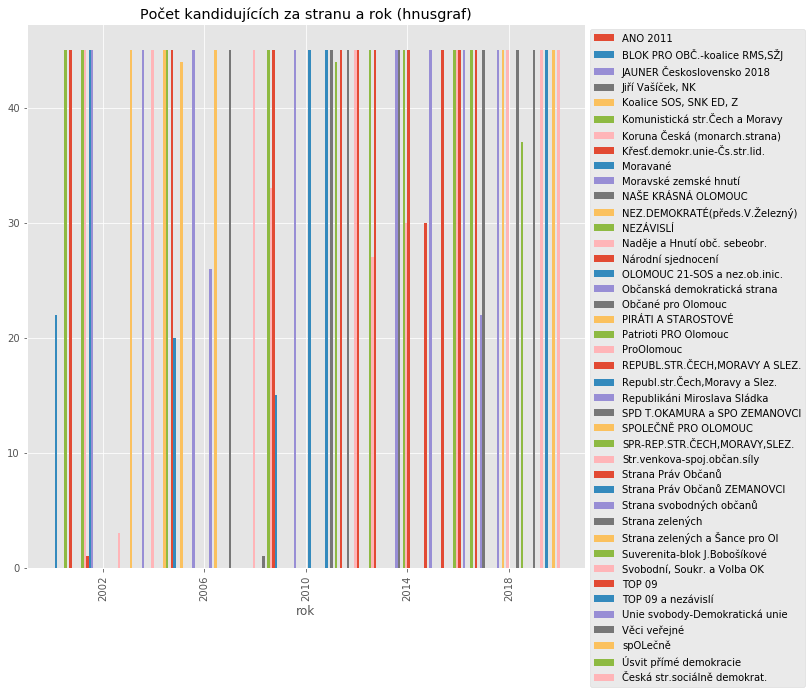

In [441]:
f = plt.figure()
df = data.groupby(["název", "rok"]).count()["příjmení, jméno, tituly"]
plt.title("Počet kandidujících za stranu a rok (hnusgraf)", color = "black")
df.unstack().T.plot(kind = "bar", ax = f.gca(), figsize = (10, 10), width = 1)
plt.legend(bbox_to_anchor = (1.0, 1.0))
plt.show()

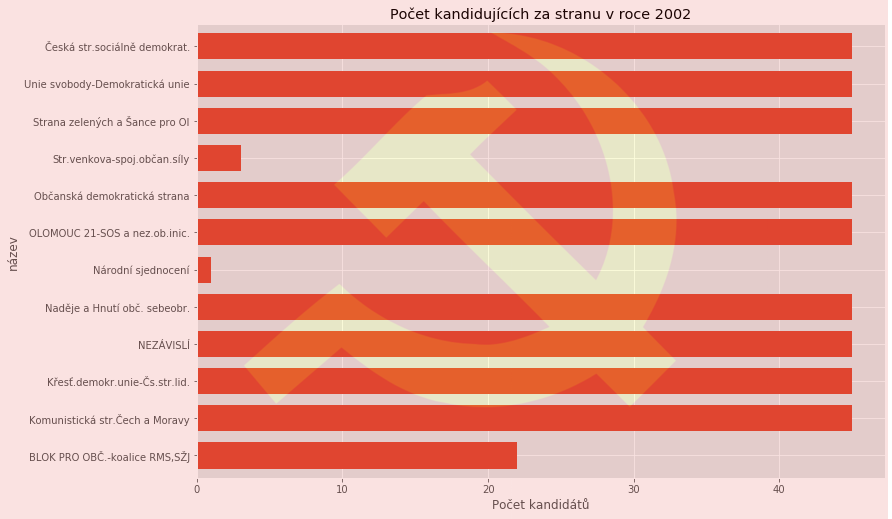

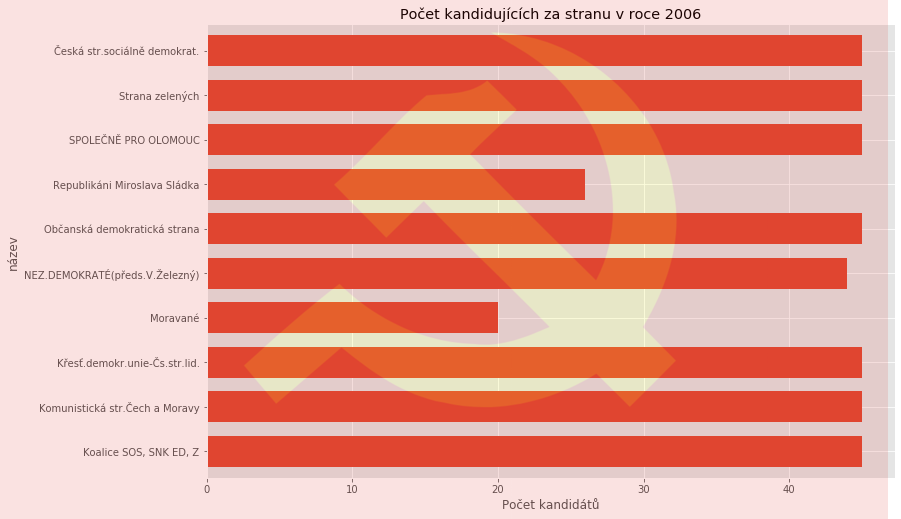

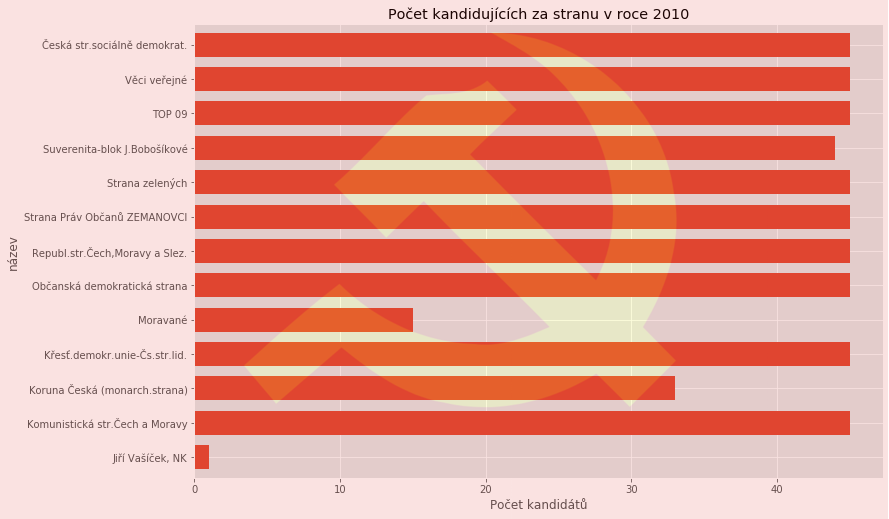

In [ ]:
watermark = matplotlib.image.imread("communist-flag-small.png")

for year in data["rok"].unique():
    f = plt.figure()
    ldf = data[data["rok"] == year].groupby(["název"]).count()["příjmení, jméno, tituly"]
    plt.title(f"Počet kandidujících za stranu v roce {year}", color = "black")
    ldf.T.plot(kind = "barh", ax = f.gca(), figsize = (10, 10), width = 0.7)
    f.figimage(watermark, alpha = 0.13, zorder = 20, resize = True)
    plt.xlabel("Počet kandidátů")
    plt.show()

In [ ]:
f = plt.figure()
plt.title("Vývoj počtu kandidujících stran")
df.unstack().count().plot.bar()


In [ ]:
f = plt.figure()
plt.title("Celkový počet volebních kandidátů v čase")
df.unstack().sum().plot.bar()

In [ ]:
def aggregate_candidate_age(name, func):
    for year in data["rok"].unique():
        f = plt.figure()
        df = data[data["rok"] == year].groupby(["název"]).agg({"věk": func})
        plt.title(f"{name} věku kandidátů podle stran za rok {year}")
        df.unstack().T.plot(kind = "barh", ax = f.gca(), figsize = (10, 10), width = 0.7, color = "navy")
        plt.xlabel("Medián věku")
        plt.ylabel("Strana")
        plt.show()

In [ ]:
aggregate_candidate_age("Medián", "median")

In [ ]:
aggregate_candidate_age("Průměr", "mean")

In [ ]:
df = parties.copy()
df.set_index("nazev")

for year in df["rok"].unique():
    f = plt.figure()
    plt.title(f"Procentuální zastoupení jednotlivých stran v roce {year}")
    df[df["rok"] == year][["nazev", "zastupitele %"]].plot.pie(y = "zastupitele %", ax = f.gca())
    plt.show()
